<a href="https://colab.research.google.com/github/mahadi0007/linear-regression-task-1-2-/blob/main/multiple_features_(1_2_task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')
root_path = '/content/drive/My Drive/Datasets/'

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
#load dataset
data = pd.read_csv(root_path + 'insurance.csv')
data=data.dropna()
data=pd.DataFrame(data)
# print(data[:30])
dataset = data.iloc[:30,[0,2,3,6]]
print(dataset)

    age     bmi  children      charges
0    19  27.900         0  16884.92400
1    18  33.770         1   1725.55230
2    28  33.000         3   4449.46200
3    33  22.705         0  21984.47061
4    32  28.880         0   3866.85520
5    31  25.740         0   3756.62160
6    46  33.440         1   8240.58960
7    37  27.740         3   7281.50560
8    37  29.830         2   6406.41070
9    60  25.840         0  28923.13692
10   25  26.220         0   2721.32080
11   62  26.290         0  27808.72510
12   23  34.400         0   1826.84300
13   56  39.820         0  11090.71780
14   27  42.130         0  39611.75770
15   19  24.600         1   1837.23700
16   52  30.780         1  10797.33620
17   23  23.845         0   2395.17155
18   56  40.300         0  10602.38500
19   30  35.300         0  36837.46700
20   60  36.005         0  13228.84695
21   30  32.400         1   4149.73600
22   18  34.100         0   1137.01100
23   34  31.920         1  37701.87680
24   37  28.025         2

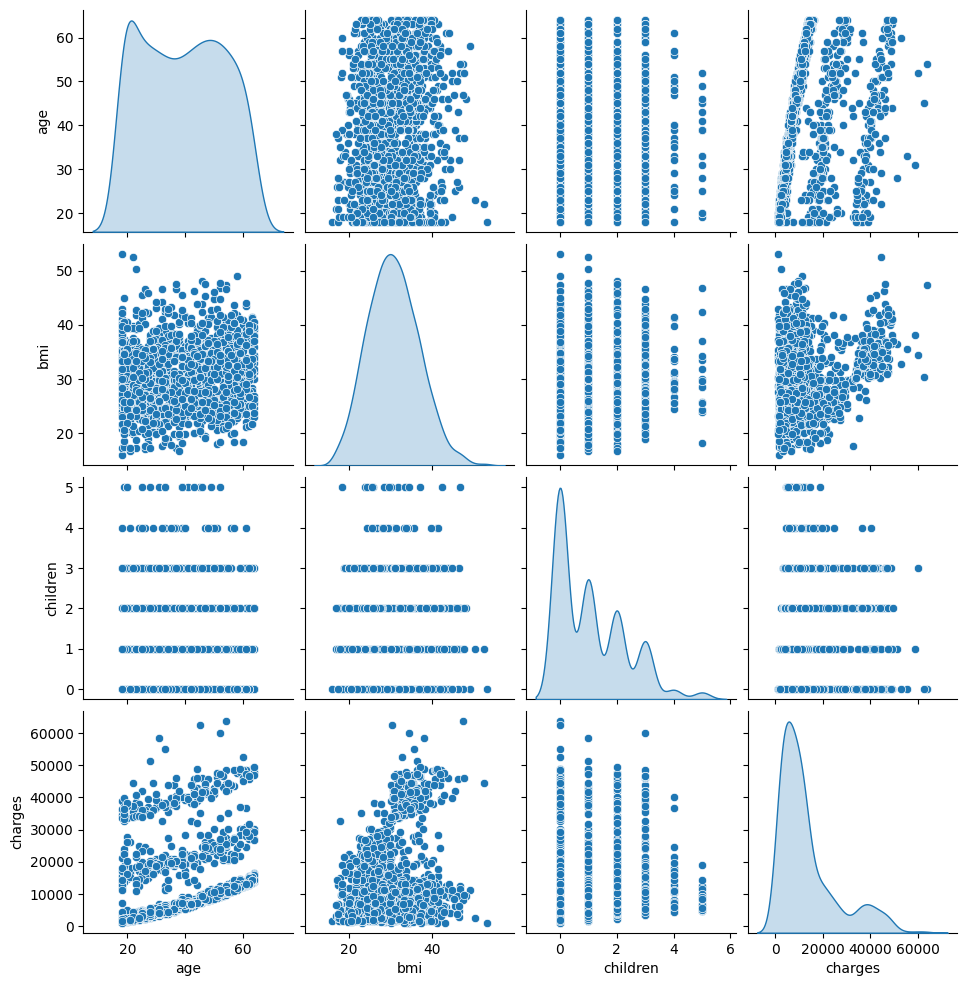

In [ ]:
sns.pairplot(data[['age', 'bmi', 'children', 'charges']], diag_kind='kde')

In [ ]:
# Define features (X) and label (y)
X = data[['age', 'bmi', 'children']].values
y = data['charges'].values

In [ ]:
# Normalize the feature columns (X)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Scikit-learn Linear Regressor
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_sklearn = lr.predict(X_test)

In [ ]:
# 2. TensorFlow Linear Regressor
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_tf.compile(optimizer='adam', loss='mse')
history_tf = model_tf.fit(X_train, y_train, epochs=100, verbose=0)
y_pred_tf = model_tf.predict(X_test).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# 3. Keras-based Linear Regressor
model_keras = Sequential([
    Dense(10, input_dim=3, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1)
])
model_keras.compile(optimizer='adam', loss='mse')
history_keras = model_keras.fit(X_train, y_train, epochs=100, verbose=0)
y_pred_keras = model_keras.predict(X_test).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Evaluate Models
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mse_tf = mean_squared_error(y_test, y_pred_tf)
mse_keras = mean_squared_error(y_test, y_pred_keras)

r2_sklearn = r2_score(y_test, y_pred_sklearn)
r2_tf = r2_score(y_test, y_pred_tf)
r2_keras = r2_score(y_test, y_pred_keras)

print(f"Scikit-learn MSE: {mse_sklearn:.2f}, R2: {r2_sklearn:.2f}")
print(f"TensorFlow MSE: {mse_tf:.2f}, R2: {r2_tf:.2f}")
print(f"Keras MSE: {mse_keras:.2f}, R2: {r2_keras:.2f}")

Scikit-learn MSE: 131201335.65, R2: 0.15
TensorFlow MSE: 161612445.84, R2: -0.04
Keras MSE: 150082325.66, R2: 0.03


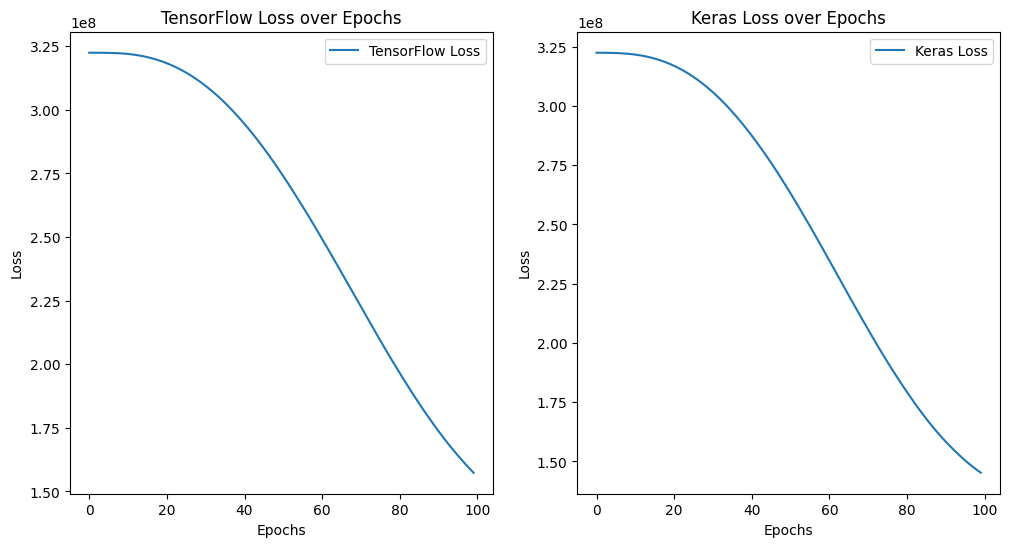

In [ ]:
# Loss plots for TensorFlow and Keras
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_tf.history['loss'], label='TensorFlow Loss')
plt.title('TensorFlow Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_keras.history['loss'], label='Keras Loss')
plt.title('Keras Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

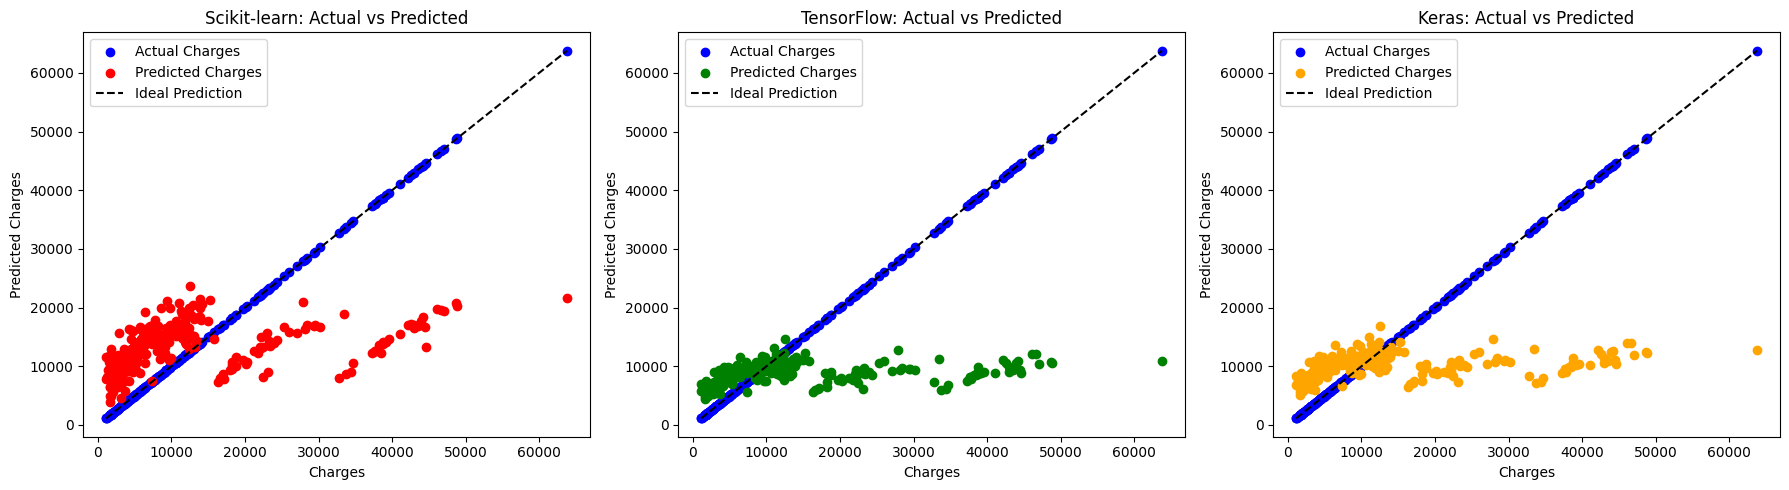

In [ ]:
# # Visualization of Actual vs Predicted for each model
plt.figure(figsize=(18, 5))

# Scikit-learn Predictions
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test, color='blue', label='Actual Charges')  # Actual charges
plt.scatter(y_test, y_pred_sklearn, color='red', label='Predicted Charges')  # Predicted charges
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal Prediction')
plt.title('Scikit-learn: Actual vs Predicted')
plt.xlabel('Charges')
plt.ylabel('Predicted Charges')
plt.legend()

# TensorFlow Predictions
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test, color='blue', label='Actual Charges')  # Actual charges
plt.scatter(y_test, y_pred_tf, color='green', label='Predicted Charges')  # Predicted charges
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal Prediction')
plt.title('TensorFlow: Actual vs Predicted')
plt.xlabel('Charges')
plt.ylabel('Predicted Charges')
plt.legend()

# Keras Predictions
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test, color='blue', label='Actual Charges')  # Actual charges
plt.scatter(y_test, y_pred_keras, color='orange', label='Predicted Charges')  # Predicted charges
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Ideal Prediction')
plt.title('Keras: Actual vs Predicted')
plt.xlabel('Charges')
plt.ylabel('Predicted Charges')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_inputs = np.array([[19, 27.9, 6], [28, 33.0, 3], [31, 25.7, 0]])  # Example inputs
test_inputs_normalized = scaler.transform(test_inputs)

pred_sklearn = lr.predict(test_inputs_normalized)
pred_tf = model_tf.predict(test_inputs_normalized).flatten()
pred_keras = model_keras.predict(test_inputs_normalized).flatten()

print(f"Predictions on Test Inputs:\n")
print(f"Scikit-learn Predictions: {pred_sklearn}")
print(f"TensorFlow Predictions: {pred_tf}")
print(f"Keras Predictions: {pred_keras}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predictions on Test Inputs:

Scikit-learn Predictions: [10722.917 12714.911  9263.048]
TensorFlow Predictions: [10481.271  9395.581  6435.503]
Keras Predictions: [11917.439 10845.302  7486.961]


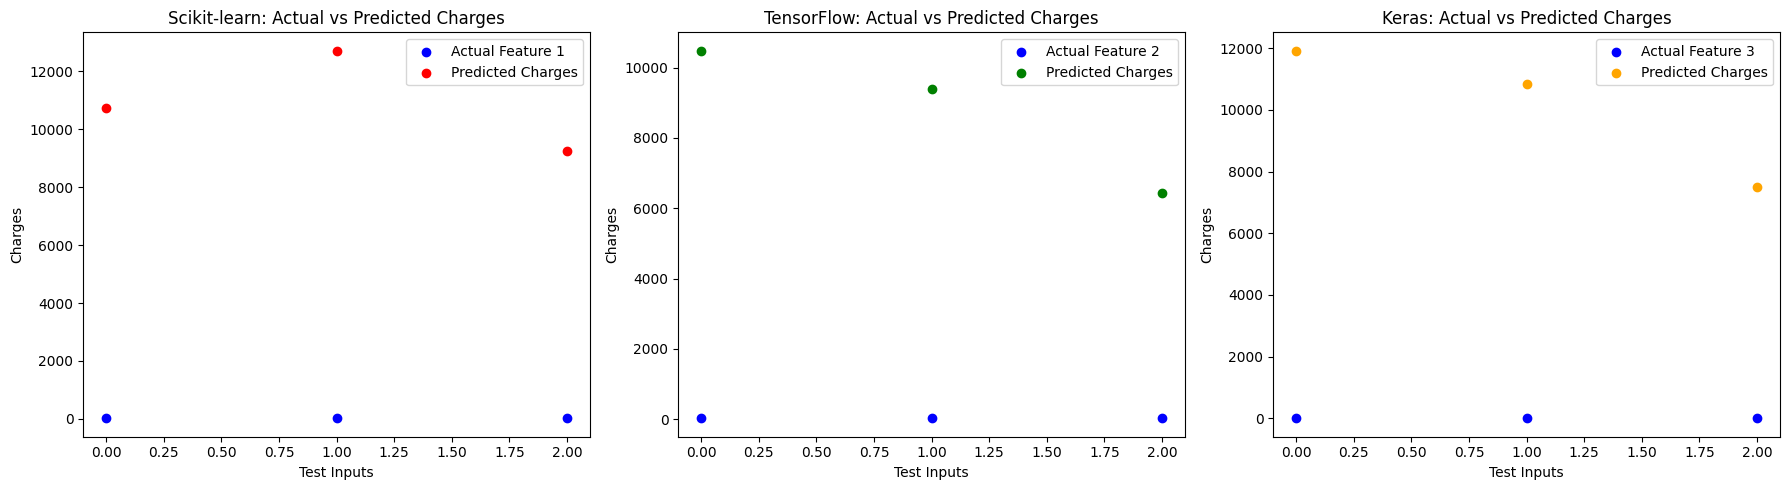

In [ ]:
plt.figure(figsize=(18, 5))

# Actual vs Predicted for Scikit-learn
plt.subplot(1, 3, 1)
plt.scatter(range(len(test_inputs)), test_inputs[:, 0], color='blue', label='Actual Feature 1')  # Age
plt.scatter(range(len(test_inputs)), pred_sklearn, color='red', label='Predicted Charges')
plt.title('Scikit-learn: Actual vs Predicted Charges')
plt.xlabel('Test Inputs')
plt.ylabel('Charges')
plt.legend()

# Actual vs Predicted for TensorFlow
plt.subplot(1, 3, 2)
plt.scatter(range(len(test_inputs)), test_inputs[:, 1], color='blue', label='Actual Feature 2')  # BMI
plt.scatter(range(len(test_inputs)), pred_tf, color='green', label='Predicted Charges')
plt.title('TensorFlow: Actual vs Predicted Charges')
plt.xlabel('Test Inputs')
plt.ylabel('Charges')
plt.legend()

# Actual vs Predicted for Keras
plt.subplot(1, 3, 3)
plt.scatter(range(len(test_inputs)), test_inputs[:, 2], color='blue', label='Actual Feature 3')  # Children
plt.scatter(range(len(test_inputs)), pred_keras, color='orange', label='Predicted Charges')
plt.title('Keras: Actual vs Predicted Charges')
plt.xlabel('Test Inputs')
plt.ylabel('Charges')
plt.legend()

plt.tight_layout()
plt.show()